In [ ]:
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist #dataset
import cv2

In [ ]:
(X_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
X_train.shape #2dimensional data ,so we have to convert all the pixel value into 1 dimensional array.(28x28) to (784x1) .This will considered as flatten input layer for for ANN

(60000, 28, 28)

In [ ]:
X_train.ndim

3

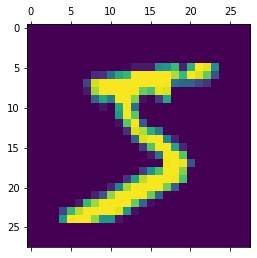

In [ ]:
plt.matshow(X_train[0])

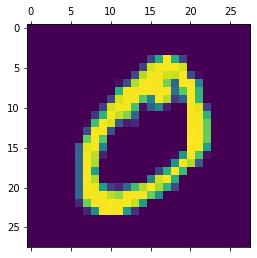

In [ ]:
plt.matshow(X_train[1])

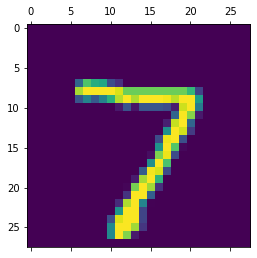

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_train[0:10] #labelled output intems of 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
# from sklearn import preprocessing 
# label_encoder = preprocessing.LabelEncoder()


In [ ]:
#Transform training and testing data to 10 classes in range [0,classes] ; num. of classes = 0 to 9 = 10 classes ( 0 to 9 labels)
num_classes=10
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
#one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
#normalizing
X_train /= 255
x_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# X_train=cv2.rgb2gray(X_train)
# y_train=cv2.rgb2gray(y_train)
# x_test=cv2.rgb2gray(x_test)
# y_test=cv2.rgb2gray(y_test)

In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(10000,activation='relu'))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
#depending of size of image,complexity of ANN model increase.So for image,while flattening feature extraction.
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 22s 8ms/step - loss: 0.1897 - accuracy: 0.9433
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0908 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0645 - accuracy: 0.9808


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9739


[0.10278861224651337, 0.9739000201225281]

In [ ]:
y_pred=model.predict(x_test)
y_pred=y_pred.round(3)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# from sklearn.metrics import accuracy_score
# acc=accuracy_score(y_test,y_pred)
# acc

1/1 [==============================] - 0s 56ms/step


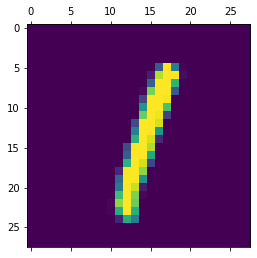

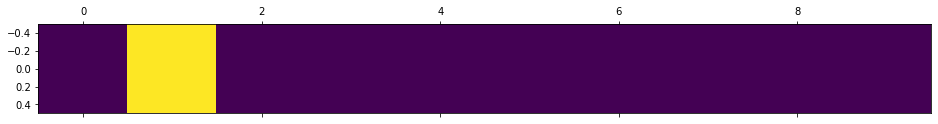

In [ ]:
output=model.predict(x_test[5])
output
plt.matshow(x_test[5])
plt.matshow(output)

1/1 [==============================] - 0s 33ms/step
[[4.6078899e-08 4.8095372e-09 1.4805924e-07 1.5912561e-09 9.9998212e-01
  8.9121590e-09 1.4353397e-08 9.5569123e-07 2.1630013e-08 1.6726923e-05]]


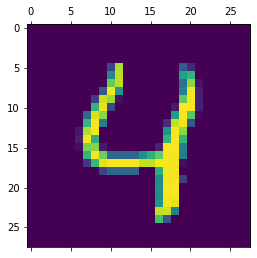

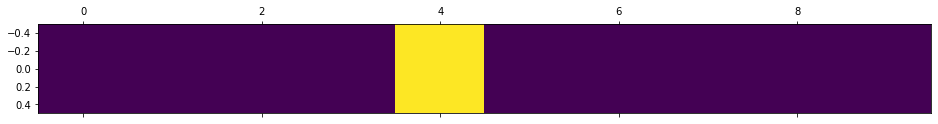

In [ ]:
output=model.predict(x_test[4])
print(output)
output=output.round()
plt.matshow(x_test[4])
plt.matshow(output)

In [ ]:
output

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
output[0][4]

1.0

In [ ]:
def digit_recognizer(output):
  if output[0][0]==1:
    return 0
  elif output[0][1]==1:
    return 1
  elif output[0][2]==1:
    return 2
  elif output[0][3]==1:
    return 3
  elif output[0][4]==1:
    return 4
  elif output[0][5]==1:
    return 5
  elif output[0][6]==1:
    return 6
  elif output[0][7]==1:
    return 7
  elif output[0][8]==1:
    return 8
  elif output[0][9]==1:
    return 9        
  else:
    print("Sorry,the Digit is not recognizable")

1/1 [==============================] - 0s 41ms/step
[[2.3872657e-13 7.9873050e-09 1.0000000e+00 7.1571760e-10 2.3724849e-14
  4.9541473e-12 5.0310311e-12 9.7433894e-10 4.2464857e-13 4.0240279e-17]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 32ms/step
[[1.10740854e-10 9.99965549e-01 1.02673759e-07 5.42549561e-10
  1.26289933e-05 8.88836382e-09 4.96411730e-08 2.11113147e-05
  3.81114205e-07 1.14870133e-07]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 33ms/step
[[9.9998903e-01 9.2122035e-13 7.1369601e-07 1.7556626e-10 3.5079664e-10
  8.0253593e-10 1.0300759e-05 3.5743888e-12 2.7399252e-09 1.5102296e-09]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 31ms/step
[[4.6078899e-08 4.8095372e-09 1.4805924e-07 1.5912561e-09 9.9998212e-01
  8.9121590e-09 1.4353397e-08 9.5569123e-07 2.1630013e-08 1.6726923e-05]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 30ms/step
[[1.4418

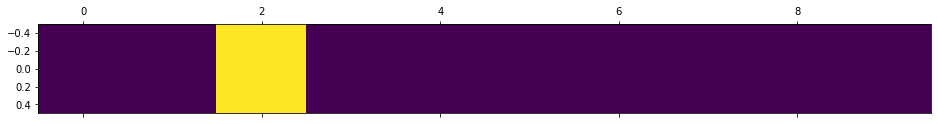

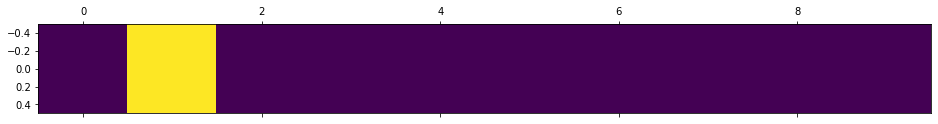

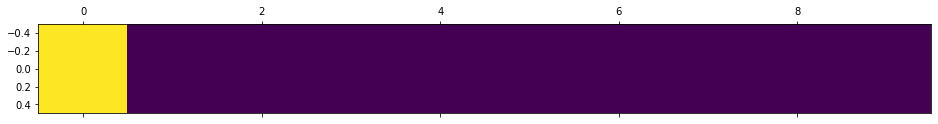

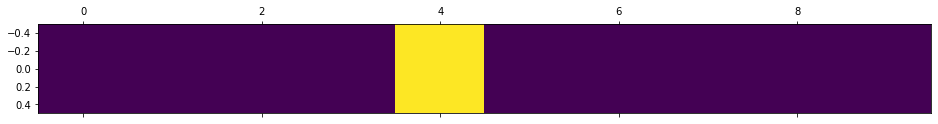

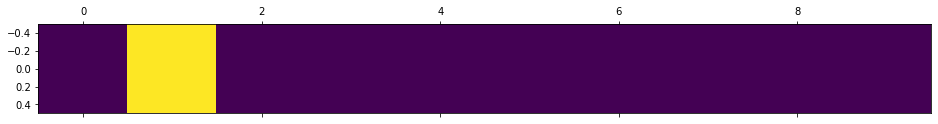

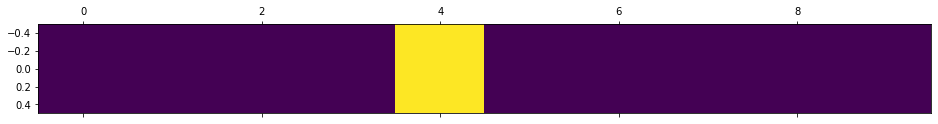

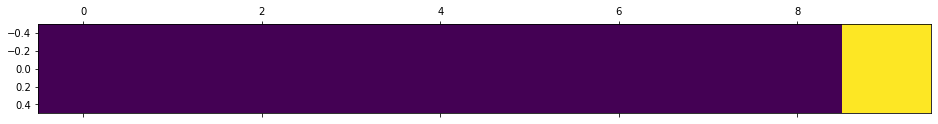

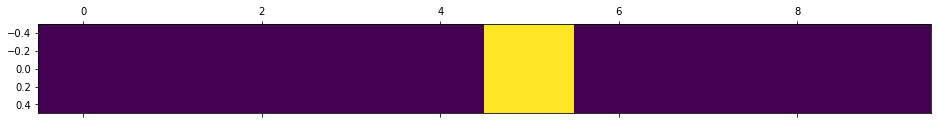

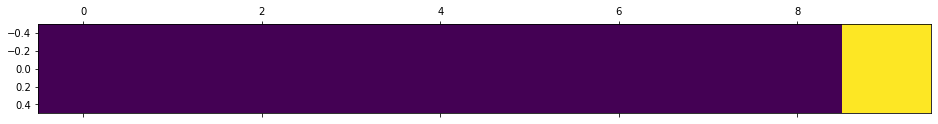

In [ ]:
for i in range(1,10,1):
  output=model.predict(x_test[i])
  print(output)
  output=output.round()
  print(output)
  plt.matshow(output)


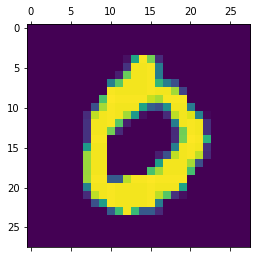

In [ ]:
plt.matshow(x_test[3])

1/1 [==============================] - 0s 26ms/step
5


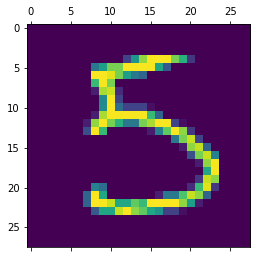

In [ ]:
j=15
output=model.predict(x_test[j])
output=output.round()
predicted_output=digit_recognizer(output)
plt.matshow(x_test[j])
print(predicted_output)


In [ ]:
#j=10,op=0
#j=2,op=1
#j=1,op=2
#j=3,op=3
#j=4,op=4
#j=15,op=5
#j=11,op=6
#j=0,op=7
#j=7,op=9

In [ ]:
#Trying with generalized image,external image

In [ ]:
img=cv2.imread('number 7.png')
img

array([[[  0,   0,   0],
        [ 32,  32,  32],
        [ 32,  32,  32],
        ...,
        [ 32,  32,  32],
        [ 32,  32,  32],
        [  0,   0,   0]],

       [[ 32,  32,  32],
        [221, 221, 221],
        [238, 238, 238],
        ...,
        [238, 238, 238],
        [221, 221, 221],
        [ 32,  32,  32]],

       [[ 32,  32,  32],
        [238, 238, 238],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [238, 238, 238],
        [ 32,  32,  32]],

       ...,

       [[ 32,  32,  32],
        [238, 238, 238],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [238, 238, 238],
        [ 32,  32,  32]],

       [[ 35,  35,  35],
        [243, 243, 243],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [243, 243, 243],
        [ 35,  35,  35]],

       [[ 22,  22,  22],
        [158, 158, 158],
        [167, 167, 167],
        ...,
        [167, 167, 167],
        [158, 158, 158],
        [ 22,  22,  22]]

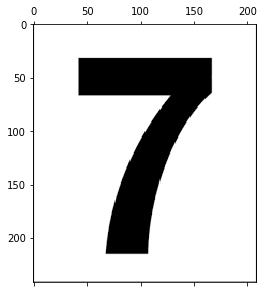

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(img)

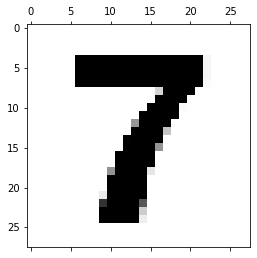

In [ ]:
img=cv2.resize(img,(28,28))
plt.matshow(img)

In [ ]:
# img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# cv2.imshow(img)

In [ ]:
output=model.predict(img)
output=output.round()
predicted_output=digit_recognizer(output)
plt.matshow(img)
print(predicted_output)


ValueError: ignored